<a href="https://colab.research.google.com/github/ayberkdt/Ayberk-MPA-MLF/blob/main/Sixth_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

In [50]:
import numpy as np

# XOR inputs (X)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR outputs (y)
y = np.array([[0], [1], [1], [0]])


In [53]:
from keras.models import Sequential
from keras.layers import Dense

# Modeli oluştur
model = Sequential()

# First Layer
model.add(Dense(8, input_dim=2, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)


In [61]:
# Make Predictions
predictions = model.predict(X)

# Turn them to the Binary Predictions
binary_predictions = (predictions > 0.5).astype(int)

# Sonuçları yazdır
print("Binary Predictions: \n", binary_predictions)

# Evaluate the model's performance on the training data
loss, accuracy = model.evaluate(X, y)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Binary Predictions: 
 [[0]
 [1]
 [1]
 [0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.1477
Accuracy: 100.00%


In [60]:
# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

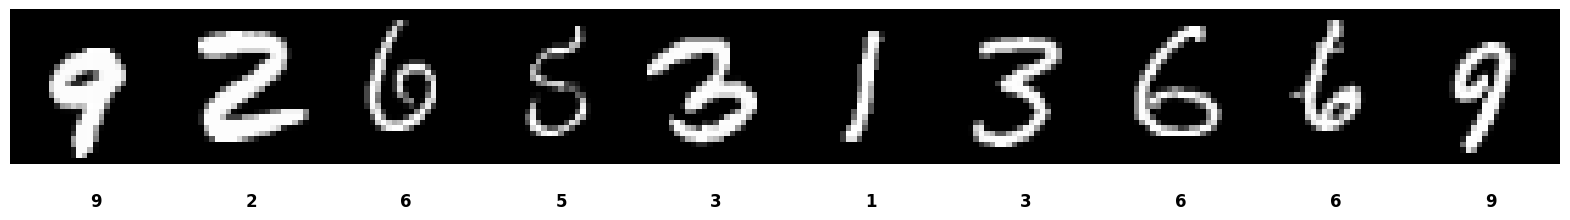

In [4]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [5]:
###################################
# Write your own code here #


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,  y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

###################################

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, InputLayer

In [ ]:
model = Sequential()
###################################
# Write your own code here #

# Convolutional Layer 1
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Faltten Layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Fully Connected Layer 2
model.add(Dense(32,activation="relu"))

# Output Layer
model.add(Dense(10, activation='softmax'))


###################################


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5488)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         702,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707,330 (2.70 MB)

 Trainable params: 707,330 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

###################################
# Write your own code here #

optimizer = "adam"
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])


###################################
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5488)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         702,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707,330 (2.70 MB)

 Trainable params: 707,330 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
###################################
# Write your own code here #

history = model.fit(x_train, y_train, epochs=10, batch_size = 300, verbose=1,validation_split = 0.2)

###################################

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.5921 - loss: 1.2404 - val_accuracy: 0.9264 - val_loss: 0.2476
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 151ms/step - accuracy: 0.9109 - loss: 0.2895 - val_accuracy: 0.9473 - val_loss: 0.1756
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.9338 - loss: 0.2146 - val_accuracy: 0.9543 - val_loss: 0.1497
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 46s 181ms/step - accuracy: 0.9466 - loss: 0.1790 - val_accuracy: 0.9617 - val_loss: 0.1241
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 39s 168ms/step - accuracy: 0.9532 - loss: 0.1531 - val_accuracy: 0.9686 - val_loss: 0.1103
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.9613 - loss: 0.1306 - val_accuracy: 0.9702 - val_loss: 0.1002
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 37s 150ms/step - accuracy: 0.9621 - loss: 0.1211 - val_accuracy: 0.9675 - val_loss: 0.1059
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.9657 - loss: 0

In [ ]:
# Check the accuracy value on Test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9712 - loss: 13.9410
Test Accuracy: 97.58%


#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

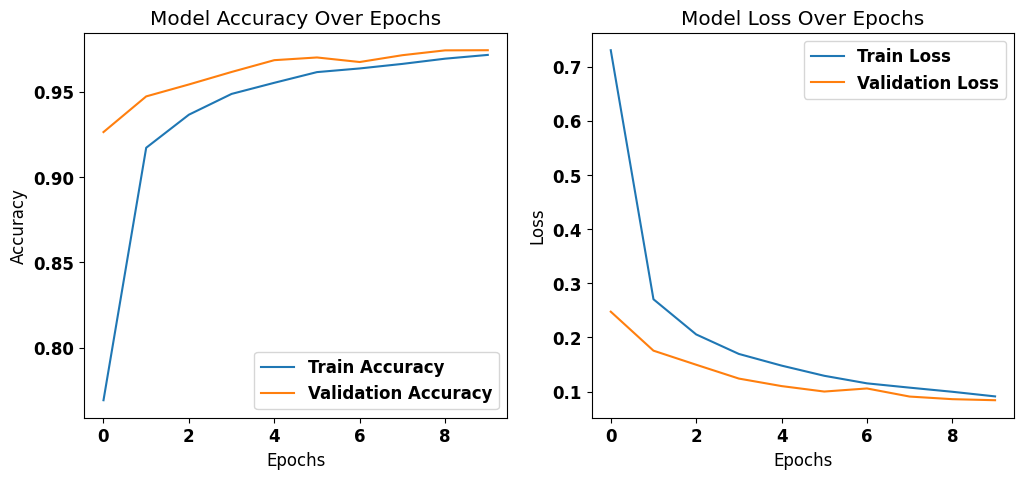

In [ ]:
###################################
# Write your own code here #

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


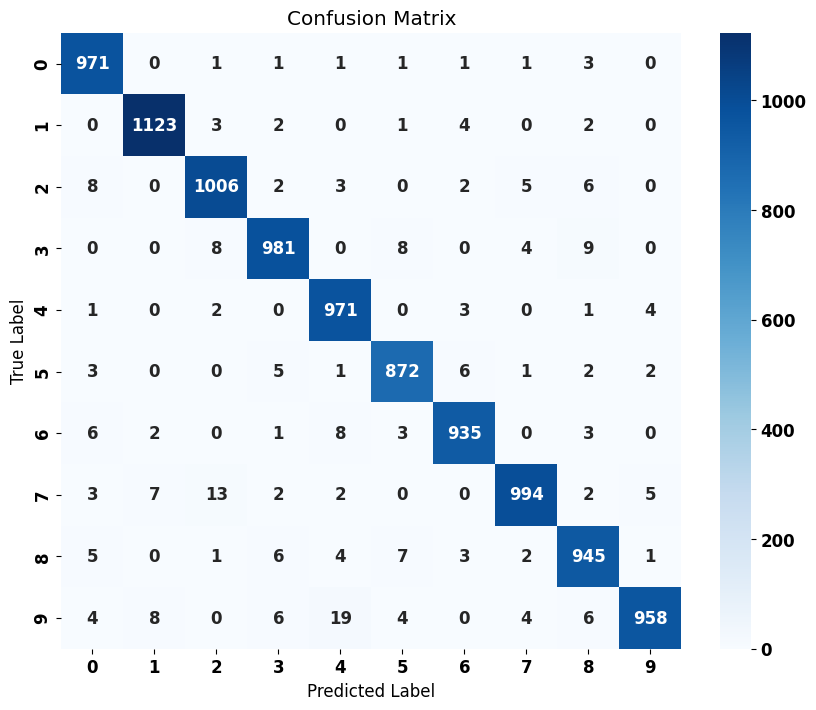

In [ ]:
###################################
# Write your own code here #
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class indices

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



###################################

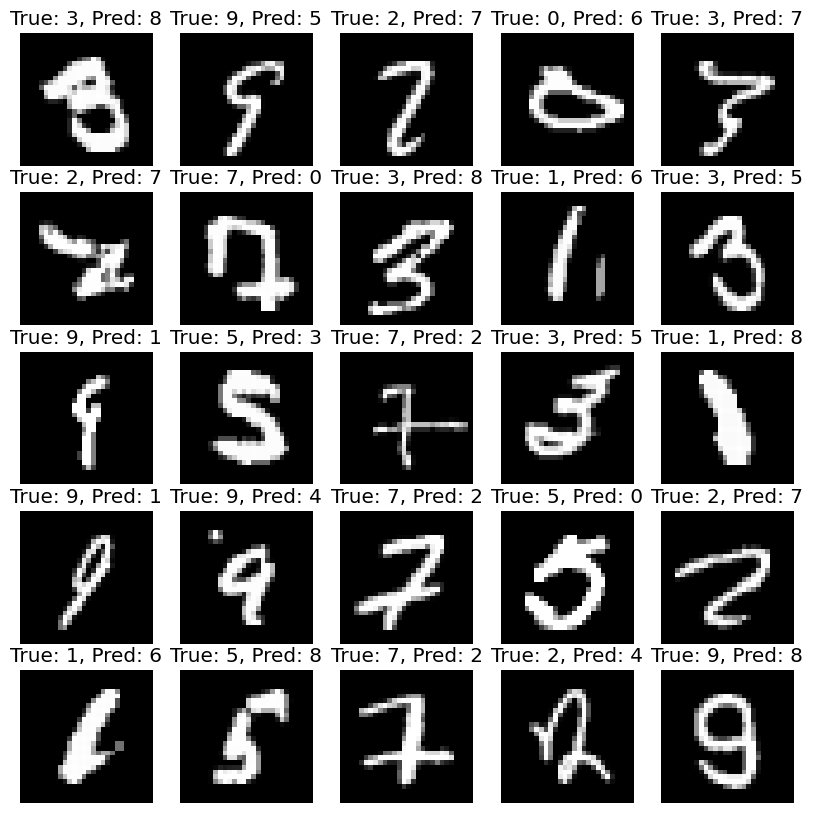

In [ ]:
import random

# Find misclassified samples
misclassified = np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(10, 10))

for i, index in enumerate(random.sample(list(misclassified), 25)):  # Show 9 misclassified images
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')

plt.show()


### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [7]:
# Load MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert from uint8 [0..255] to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Optional: Normalize pixel values into [0..1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Standardization: compute mean & std from your training set
mean_px = x_train.mean()
std_px = x_train.std()

# Important: add a small epsilon when dividing to avoid NaNs if std_px is very small.
epsilon = 1e-7

# Standardize training and test sets
x_train = (x_train - mean_px) / (std_px + epsilon)
x_test = (x_test - mean_px) / (std_px + epsilon)

# For a CNN, you need a 4D tensor: (batch, height, width, channels)
# MNIST is single channel (grayscale), so expand dims to get shape (batch, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Build your model
model = Sequential()

# Convolutional Layer 1 with (32 filters and 3x3 kernel)
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),
                 padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer 2 with (64 filters and 3x3 kernel)
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Layer 3 with (128 filters and 3x3 kernel)
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer 1
model.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.25))

# Dense Layer 2
model.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

from tensorflow.keras.callbacks import EarlyStopping

###################################
# Write your own code here #

# Compile the model (start with a certain learning rate, e.g. 1e-3)
optimizer = "adam"
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics = ["accuracy"])



# Create the ReduceLROnPlateau callback
variable_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,  # If val_loss doesn't improve for 2 epochs, reduce the LR
    min_lr=1e-6  # Prevents the LR from going too low
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

###################################
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,610 (959.41 KB)

 Trainable params: 245,162 (957.66 KB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
###################################
# Write your own code here #

history = model.fit(x_train, y_train, epochs=15, batch_size = 150, verbose=1,validation_split = 0.2, callbacks=[variable_learning_rate])

###################################

Epoch 1/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 61s 183ms/step - accuracy: 0.7575 - loss: 0.7941 - val_accuracy: 0.8740 - val_loss: 0.5119 - learning_rate: 0.0010
Epoch 2/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.9759 - loss: 0.1158 - val_accuracy: 0.9876 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 3/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 59s 184ms/step - accuracy: 0.9826 - loss: 0.0875 - val_accuracy: 0.9888 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 4/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 80s 179ms/step - accuracy: 0.9865 - loss: 0.0762 - val_accuracy: 0.9868 - val_loss: 0.0838 - learning_rate: 0.0010
Epoch 5/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 177ms/step - accuracy: 0.9898 - loss: 0.0604 - val_accuracy: 0.9910 - val_loss: 0.0600 - learning_rate: 0.0010
Epoch 6/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 83s 182ms/step - accuracy: 0.9923 - loss: 0.0522 - val_accuracy: 0.9902 - val_loss: 0.0676 - learning_rate: 0.0010
Epoch 7/15
320/320 ━━━━━━━━━━━━━━━━━━━━ 57s 177ms/step - accuracy: 0.9

In [23]:
# Check the accuracy value on Test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9918 - loss: 0.0526
Test Accuracy: 99.36%


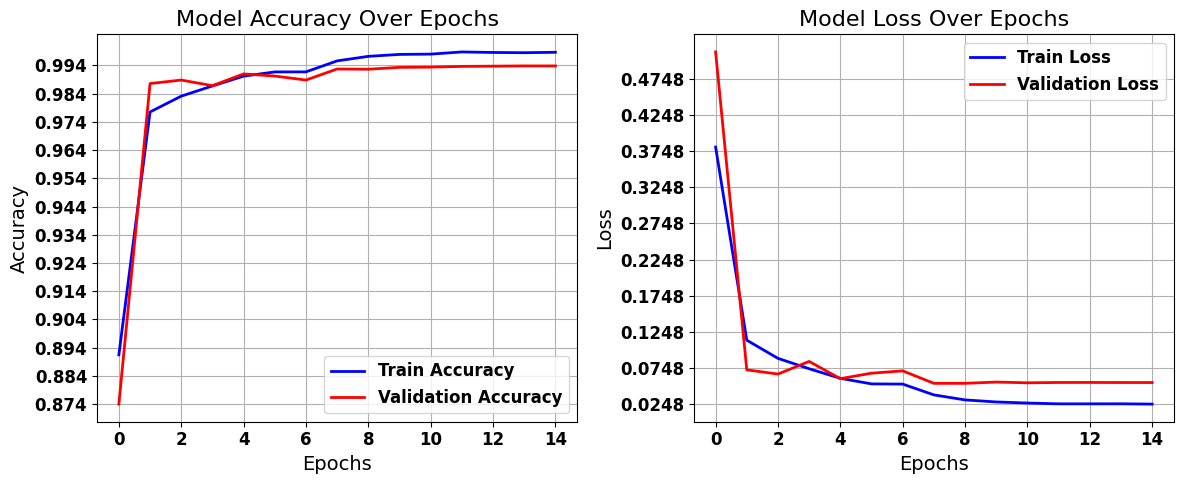

In [49]:
import matplotlib.pyplot as plt
import numpy as np


# Plot Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Set the desired increment (adjust this value)
step_size_acc = 0.01
# Dynamic range calculation based on the min and max values of the training and validation data
y_min_acc = min(min(history.history['accuracy']), min(history.history['val_accuracy']))  # Minimum value across accuracy (train + validation)
y_max_acc = max(max(history.history['accuracy']), max(history.history['val_accuracy']))  # Maximum value across accuracy (train + validation)


# Set dynamic Y ticks based on the data range and desired step size
plt.yticks(np.arange(y_min_acc, y_max_acc, step_size_acc))

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Model Loss Over Epochs', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Set the desired increment (adjust this value)
step_size_loss = 0.05
# Dynamic range calculation based on the min and max values of the training and validation data
y_min_loss = min(min(history.history['loss']), min(history.history['val_loss']))  # Minimum value across loss (train + validation)
y_max_loss = max(max(history.history['loss']), max(history.history['val_loss']))  # Maximum value across loss (train + validation)


# Set dynamic Y ticks for loss plot as well
plt.yticks(np.arange(y_min_loss, y_max_loss, step_size_loss))

# Automatically adjust layout
plt.tight_layout()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


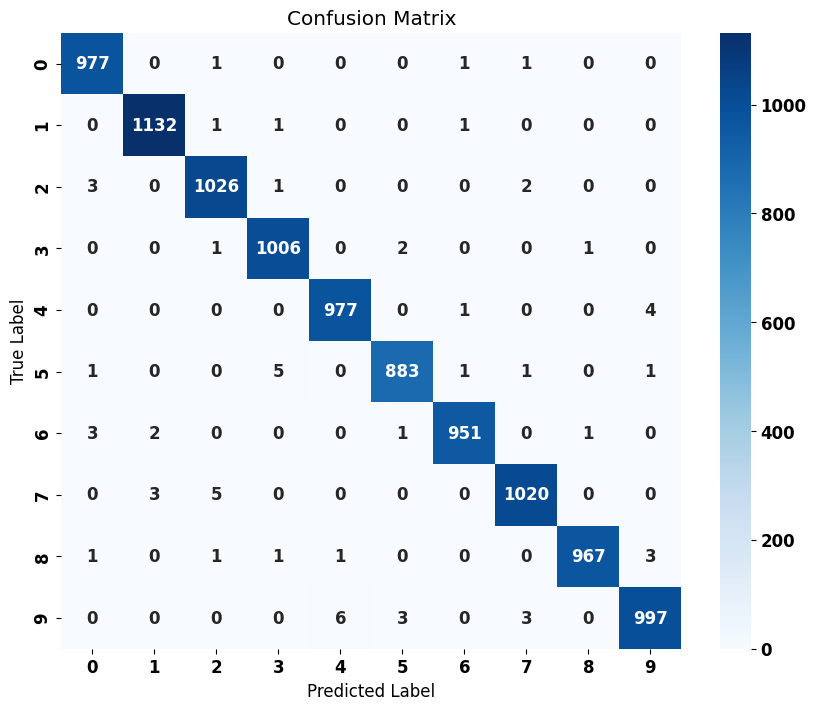

In [25]:
###################################
# Write your own code here #
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class indices

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



###################################

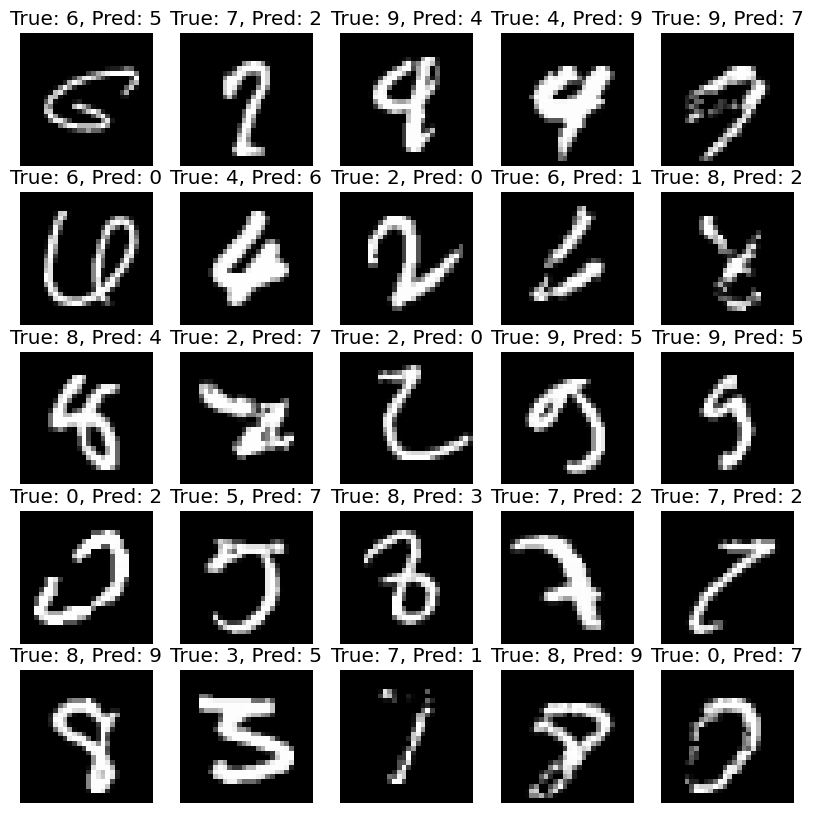

In [26]:
import random

# Find misclassified samples
misclassified = np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(10, 10))

for i, index in enumerate(random.sample(list(misclassified), 25)):  # Show 9 misclassified images
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')

plt.show()


In [47]:
import pickle

# Save the model
filename = 'cnn_model.sav'
pickle.dump(model, open(filename, 'wb'))